# Skin Cancer ISIC
## Objectives :
## 1. Classification (supervised) of the different images into the possible classes using a pretrained network;
## 2. Cluster the different images in a Deep Clustering way. Using an AutoEncoder, find/build a latent space that is able reduce the dimension of each images and explain the differences between every different skin cancers. 

### Steps to follow :
- Load image ;
- Data visualization :
    - Histogram ;
    - Number of elements in classes (imbalanced or not ?)
- Litterature review ;
- Normalize Data ;
- Create DataLoader ;
- Model to pick :
    - AutoEncoder (which type) ;
    - t-SNE ;
    - ...
- Training loop ;
- Test ;
- Evaluation ;


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import cv2
import os
import numpy as np

# function to load images
def load_images(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        # access label
        for i, filename in enumerate(os.listdir(os.path.join(folder, label))):
            img_path = os.path.join(os.path.join(folder, label),filename)
            if img_path.endswith('.jpg') and (i < 50):
                # read image
                img = cv2.imread(img_path)
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (450, 600))
                # add image and label to lists
                images.append(img)
                labels.append(label)
    # convert images and labels to numpy arrays
    images = np.stack(images)
    labels = np.array(labels)
    
    return images, labels

# 1. Basic preliminary steps

# Image Loading :
### - Train (70 %)
### - Test (30 %)

In [5]:
path = "/content/drive/MyDrive/SkinCancerClf"

# get path to train & test data
train_path = os.path.join(path, "Train")
test_path = os.path.join(path, "Test")
             
train_images, train_labels = load_images(train_path)
test_images, test_labels = load_images(test_path)
print(train_images.shape)
print(train_labels.shape)

(450, 600, 450, 3)
(450,)


### Encoding the labels for the training

In [6]:
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the encoder to your labels to obtain the mapping
label_encoder.fit(train_labels)

# Encode your labels
encoded_labels = label_encoder.transform(train_labels)

print(encoded_labels)

[7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7
 7 7 7 7 7 7 7 7 7 7 7 7 7 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8
 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 8 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2]


# Bit of Visualization

## 1 . Vascular Lesion image example.

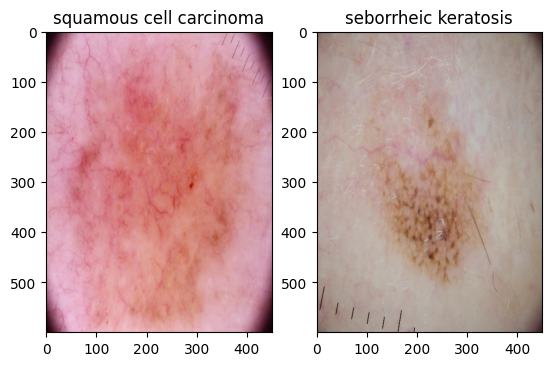

In [8]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(1,2,1)
plt.imshow(train_images[0])
plt.title(train_labels[0])

plt.subplot(1,2,2)
plt.imshow(train_images[150])
plt.title(train_labels[150])
plt.show()

## 2. Comparing pixel value distribution between two different skin cancer.

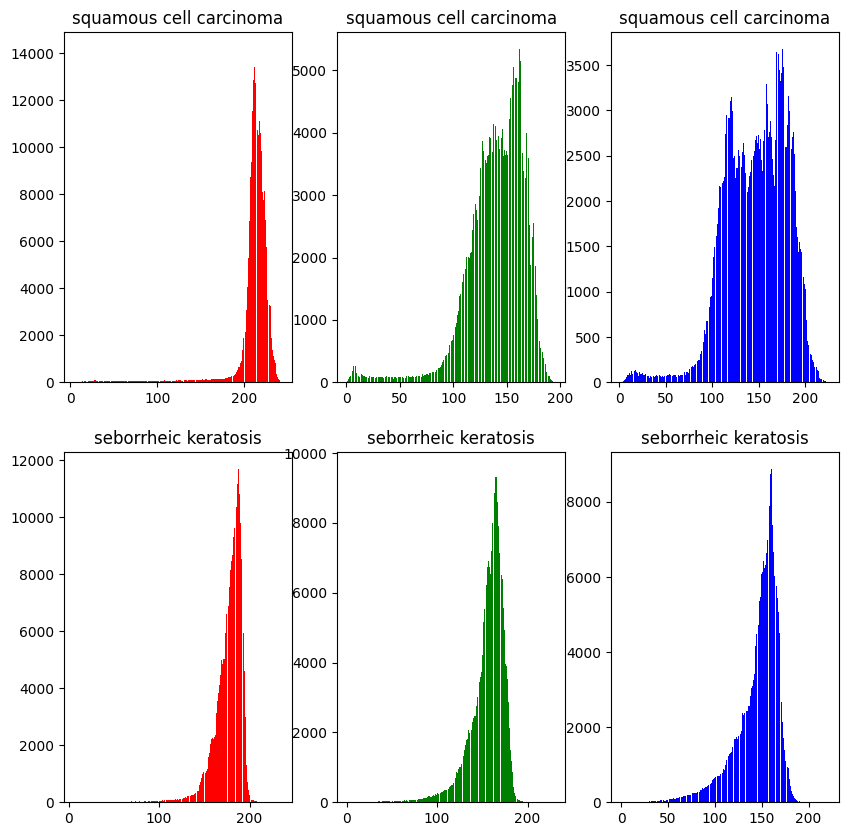

In [9]:
plt.figure(figsize=(10, 10))
plt.subplot(2,3,1)
plt.hist(train_images[0][...,0].ravel(), bins=256, color='r')
plt.title(train_labels[0])

plt.subplot(2,3,2)
plt.hist(train_images[0][...,1].ravel(), bins=256, color='g')
plt.title(train_labels[0])

plt.subplot(2,3,3)
plt.hist(train_images[0][...,2].ravel(), bins=256, color='b')
plt.title(train_labels[0])

plt.subplot(2,3,4)
plt.hist(train_images[150][...,0].ravel(), bins=256, color='r')
plt.title(train_labels[150])

plt.subplot(2,3,5)
plt.hist(train_images[150][...,1].ravel(), bins=256, color='g')
plt.title(train_labels[150])

plt.subplot(2,3,6)
plt.hist(train_images[150][...,2].ravel(), bins=256, color='b')
plt.title(train_labels[150])

plt.show()

# Basic Observations :
### 1. Different 'mean' between the two images -> 'higher mean' for Vascular Lesion.
### 2. Different 'variance' between the two images -> 'higher variance' for Melanoma.
### 3. Mode : 
#### - 1. Highly visible mode for Vascular Lesion ;
#### - 2. Bimodal distribution for Melanoma ; 

# What can we expect :
## -> Notable difference (mean, variance, ...) between classes !

#   

# Preprocessing steps :

## 1. Resize & Crop -> Already done previously ;
## 2. Normalization ;
## 3. Noise reduction ;
## 4. Augmentation (if needed) ;

## 2. Normalization funtion and call

In [10]:
import numpy as np

def normalize_images(images):
    # Convert the pixel values to float and normalize
    normalized_images = images.astype('float32') / 255.0
    
    return normalized_images


normalized_train_images = normalize_images(train_images)
normalized_test_images = normalize_images(test_images)
print(normalized_train_images[0].mean())
print(normalized_train_images[0].var())

0.6509506
0.028242595


## 3. Denoising & Morphological Operation 
#### (Denoising is reducing the image quality in this case so we avoid this)

In [11]:
# def denoise(images):
#     denoised_images = np.empty_like(images)
    
#     for i in range(len(images)):
#         denoised_images[i] = cv2.GaussianBlur(images[i], (3, 3), 0)
    
#     return denoised_images

def morphological_operation(images):
    processed_images = np.empty_like(images)
    
    for i in range(len(images)):
        # Apply erosion and dilation operations on each color channel separately
        channels = cv2.split(images[i])
        processed_channels = []
        
        kernel = np.ones((3, 3), np.uint8)
        for channel in channels:
            eroded_channel = cv2.erode(channel, kernel, iterations=1)
            dilated_channel = cv2.dilate(channel, kernel, iterations=1)
            processed_channels.append(dilated_channel)
        
        processed_image = cv2.merge(processed_channels)
        processed_images[i] = processed_image
    
    return processed_images

# processed_train_batch = denoise(normalized_train_images)
# processed_test_batch = denoise(normalized_test_images)
processed_train_batch = morphological_operation(normalized_train_images)
processed_test_batch = morphological_operation(normalized_test_images)

# Dataloader creation

In [12]:
import torch
from torch.utils.data import Dataset

class CancerDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images
        self.labels = labels
        self.transform = transform
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        # Load the image
        image = self.load_image(self.images[index])
        
        # Apply transformations if provided
        if self.transform:
            image = self.transform(image)
        
        label = self.labels[index]
        
        return image, label
    
    def load_image(self, img):
        # Implement your image loading logic here
        # Return the loaded image as a torch.Tensor or numpy.ndarray
        
        # Example: Using torchvision to load and convert the image to tensor
        from torchvision import transforms
        img_transforms = transforms.Compose([
            transforms.ToTensor()
        ])
        image = img_transforms(img)
        
        return image


# Model based on VGG16 creation (fine-tuning)

In [13]:
import torch
import torch.nn as nn
import torchvision.models as models

class SkinCancerClassifier(nn.Module):
    def __init__(self, num_classes):
        super(SkinCancerClassifier, self).__init__()
        
        # Load the pre-trained VGG16 model
        self.vgg = models.vgg16(pretrained=True)
        
        # Replace the last fully connected layer
        num_features = self.vgg.classifier[-1].in_features
        self.vgg.classifier[-1] = nn.Linear(num_features, num_classes)
        
        # Softmax activation
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = self.vgg(x)
        x = self.softmax(x)
        return x


In [14]:
from torch.utils.data import DataLoader

# Assuming you have lists of image paths and labels
train_images = processed_train_batch
labels = encoded_labels

# Instantiate the custom dataset
dataset = CancerDataset(train_images, labels)

# Create a data loader
batch_size = 8
data_loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

# set number of classes 
num_classes = 9
# Define your model
model = SkinCancerClassifier(num_classes)

# Define your loss function and optimizer
criterion = nn.CrossEntropyLoss() # Good for image classification
optimizer = optim.Adam(model.parameters(), lr=0.001) # Best optimizer rn

# Set the device (CPU or GPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Move the model to the device
model = model.to(device)

# Set the number of epochs
num_epochs = 5

# Iterate over the epochs
for epoch in range(num_epochs):
    running_loss = 0.0
    
    # Iterate over the batches
    for images, labels in data_loader:
        # Move the data to the device
        images = images.to(device)
        labels = labels.to(device)
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(images)
        
        # Compute the loss
        loss = criterion(outputs, labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Accumulate the loss
        running_loss += loss.item() * images.size(0)
    
    # Calculate the average loss for the epoch
    epoch_loss = running_loss / len(dataset)
    
    # Print the average loss for the epoch
    print(f"Epoch [{epoch+1}/{num_epochs}] Loss: {epoch_loss:.4f}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:02<00:00, 258MB/s]


Epoch [1/5] Loss: 2.2625
Epoch [2/5] Loss: 2.2608
Epoch [3/5] Loss: 2.2608
Epoch [4/5] Loss: 2.2608
Epoch [5/5] Loss: 2.2608
